In [1]:
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, LlamaForCausalLM, LlamaTokenizerFast
from peft import PeftModel  # 0.5.0

In [2]:
# Load Models
base_model = "NousResearch/Llama-2-13b-hf"
peft_model = "FinGPT/fingpt-sentiment_llama2-13b_lora"
tokenizer = LlamaTokenizerFast.from_pretrained(base_model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
model = LlamaForCausalLM.from_pretrained(base_model, trust_remote_code=True, device_map = "cuda:0", load_in_8bit = True,)
model = PeftModel.from_pretrained(model, peft_model)
model = model.eval()

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/home/indi/.local/share/virtualenvs/finance-python-GZ7M0BLx/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/indi/.local/share/virtualenvs/finance-python-GZ7M0BLx/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fi

In [22]:
import os
import pandas as pd

# youtube/_transcribe folder 내 파일 명들을 다 가져옴
path = './youtube/_transcribe'
file_list = os.listdir(path)
file_list.sort()
file_list

# _를 기준으로 파일명을 나눠 데이터프레임에 저장
# 예시 6_20231003_PHP Stock Market Analyzer - 3 - Connecting to the Database 7Ub8uHHTTwo.txt

# 첫번째 _ : 파일번호
# 두번째 _ : 영상 게시 날짜
# 세번째 _ : 영상 제목

# 파일번호, 영상 게시 날짜, 영상 제목, 파일명, 고유번호를 저장할 데이터프레임 생성
df = pd.DataFrame(columns=['file_number', 'date', 'title', 'file_name'])

# 파일명을 _를 기준으로 나눠 데이터프레임에 저장
for i in range(len(file_list)):
    file_name = file_list[i]
    file_name_split = file_name.split('_')
    file_number = file_name_split[0]
    date = file_name_split[1]
    title = file_name_split[2][:-16]
    df.loc[i] = [file_number, date, title, file_name]

# 고유 아이디는 확장자를 제외하고 무조건 11자리임
df['video_id'] = df['file_name'].str[-15:-4]

df.sort_values(by=['date'], axis=0, inplace=True)

# date를 날짜로 변환
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='ignore')

# date를 기준으로 2017년 이전 데이터는 제외
df = df[df['date'] >= '2017-01-01']

# 파일번호 제거, 파일 이름 제거, 인덱스 제거
df.drop(['file_number'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

# Date를 기준으로 월 별 groupby 수행 후 count 값을 히스토그램으로 표시
# df.groupby(df['date'].dt.strftime('%Y-%m'))['date'].count().plot(kind="bar")

# file_name을 기준으로 파일을 읽어 들여서 text에 저장
text = []
for i in range(len(df)):
    file_name = df['file_name'][i]
    f = open('./youtube/_transcribe/' + file_name, 'r', encoding='utf-8')
    text.append(f.read())
    f.close()
    
# df에 text 열을 추가하고 text를 저장
df['text'] = text
df.to_csv('./youtube/_transcribe/youtube_transcribe.csv', index=False)

,date,title,file_name,video_id,text
0,2017-01-02,Stock Market Predictions for 2017,498_20170102_Stock Market Predictions for 2017...,S6gqWLzWN5A,This is the time of year for stock market pre...
1,2017-01-09,Learn the Magic Trick to Invest On Your Own - ...,499_20170109_Learn the Magic Trick to Invest O...,__4GpjTlpMg,Few days back my friend John Jenkins who is a...
2,2017-01-10,GTA V Assassination Stock Market M1The Hotel ...,320_20170110_GTA V Assassination Stock Market...,OjwCfLgkN2E,"Hey there guys, today I will be showing you h..."
3,2017-01-13,How to Conduct a Competitive Analysis,503_20170113_How to Conduct a Competitive Anal...,C91utiNU0cI,Hi and welcome to today's lesson where we're ...
4,2017-01-17,THIS Most Important US Stock Market Indicator ...,502_20170117_THIS Most Important US Stock Mark...,l9YNH1R3OHI,Stock markets are constantly moving erratical...
...,...,...,...,...,...
2814,2023-11-15,SP 500 Analysis Michael Burrys NEW BIG Bet,2688_20231115_SP 500 Analysis Michael Burrys N...,-97QdunCu-M,"Today, we had a monster gap up in the market...."
2815,2023-11-15,MASSIVE BULL RUN IN THE STOCK MARKET MILLIONAI...,2692_20231115_MASSIVE BULL RUN IN THE STOCK MA...,WJk5PnoWbEc,I don't even know what to say. When you have ...
2816,2023-11-15,VIX Expiration MOPEX SP500 SPY QQQ Nasdaq St...,2696_20231115_VIX Expiration MOPEX SP500 SPY...,X_g4MnIoJok,"Hello everyone, so there's a lot to talk abou..."
2817,2023-11-15,The Stock Market Is INSANE - Biggest Russell 2...,2699_20231115_The Stock Market Is INSANE - Big...,KN5-VZCJ5FM,"All right, ladies and gentlemen, I hope you h..."


In [177]:
from tqdm import tqdm
import random

# Assuming necessary imports for model, tokenizer, and df are done above
instruction = "What is the sentiment of this speech? Please choose an answer from {negative/neutral/positive}"
sentiments = []  # Final output list

df = pd.read_csv('./youtube/_transcribe/youtube_transcribe.csv')
text = df['text'][1355:] # df의 1355번째 행부터 끝까지 text를 추출 (중간에 끊김)

for _text in tqdm(text):
    text_length = len(str(_text))
    
    # Randomly sample a 512-character segment from the text
    if text_length <= 512:
        segment = _text
    else:
        start_index = random.randint(0, text_length - 512)
        segment = _text[start_index:start_index + 512]

    # Analyze the sentiment of the segment
    model_input = f'''Instruction: {instruction}\nInput: {segment}\nAnswer: '''

    tokens = tokenizer(model_input, return_tensors='pt', padding=True)
    res = model.generate(**tokens, max_length=512)
    res_sentences = [tokenizer.decode(i) for i in res]

    sentiment = [o.split("Answer: ")[1].replace('</s>', '').strip() for o in res_sentences][0]
    sentiments.append(sentiment)

# Add the sentiments to the df
sentiments_df = pd.DataFrame(sentiments, columns=['sentiment'])
sentiments_df.to_csv('./youtube/_transcribe/youtube_sentiment2.csv', index=False)

  0%|          | 0/1464 [00:00<?, ?it/s]/home/indi/.local/share/virtualenvs/finance-python-GZ7M0BLx/lib/python3.10/site-packages/transformers/generation/utils.py:1529: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
 12%|█▏        | 172/1464 [11:23<37:46,  1.75s/it]   /home/indi/.local/share/virtualenvs/finance-python-GZ7M0BLx/lib/python3.10/site-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 546, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
100%|██████████| 1464/1464 [1:55:17<00:00,  4.73s/it]  


In [ ]:
# sentiments가 neutral, negative, positive가 아닌 행을 NaN으로 변경
import numpy as np
sentiments_df = pd.read_csv('./youtube/_transcribe/youtube_sentiment.csv')
df = pd.read_csv('./youtube/_transcribe/youtube_transcribe.csv')

sentiments_df['sentiment'] = sentiments_df['sentiment'].apply(lambda x: np.nan if x not in ['neutral', 'negative', 'positive'] else x)
df1 = pd.concat([df, sentiments_df], axis=1) # df와 sentiments_df를 합침
df2 = df1.dropna(subset=['sentiment']) # sentiment가 NaN인 행을 제거
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='ignore') # date를 날짜로 변환

# 비율을 데이터프레임으로 저장
df3 = df2.groupby([df2['date'].dt.strftime('%Y-%m'), 'sentiment'])['sentiment'].count().unstack('sentiment')

# NaN 값을 0으로 변경
df3.fillna(0, inplace=True)
df3['total'] = df3['negative'] + df3['neutral'] + df3['positive']
df3['negative'] = df3['negative'] / df3['total']
df3['neutral'] = df3['neutral'] / df3['total']
df3['positive'] = df3['positive'] / df3['total']
df3.drop(['total'], axis=1, inplace=True)
df3.reset_index(inplace=True)

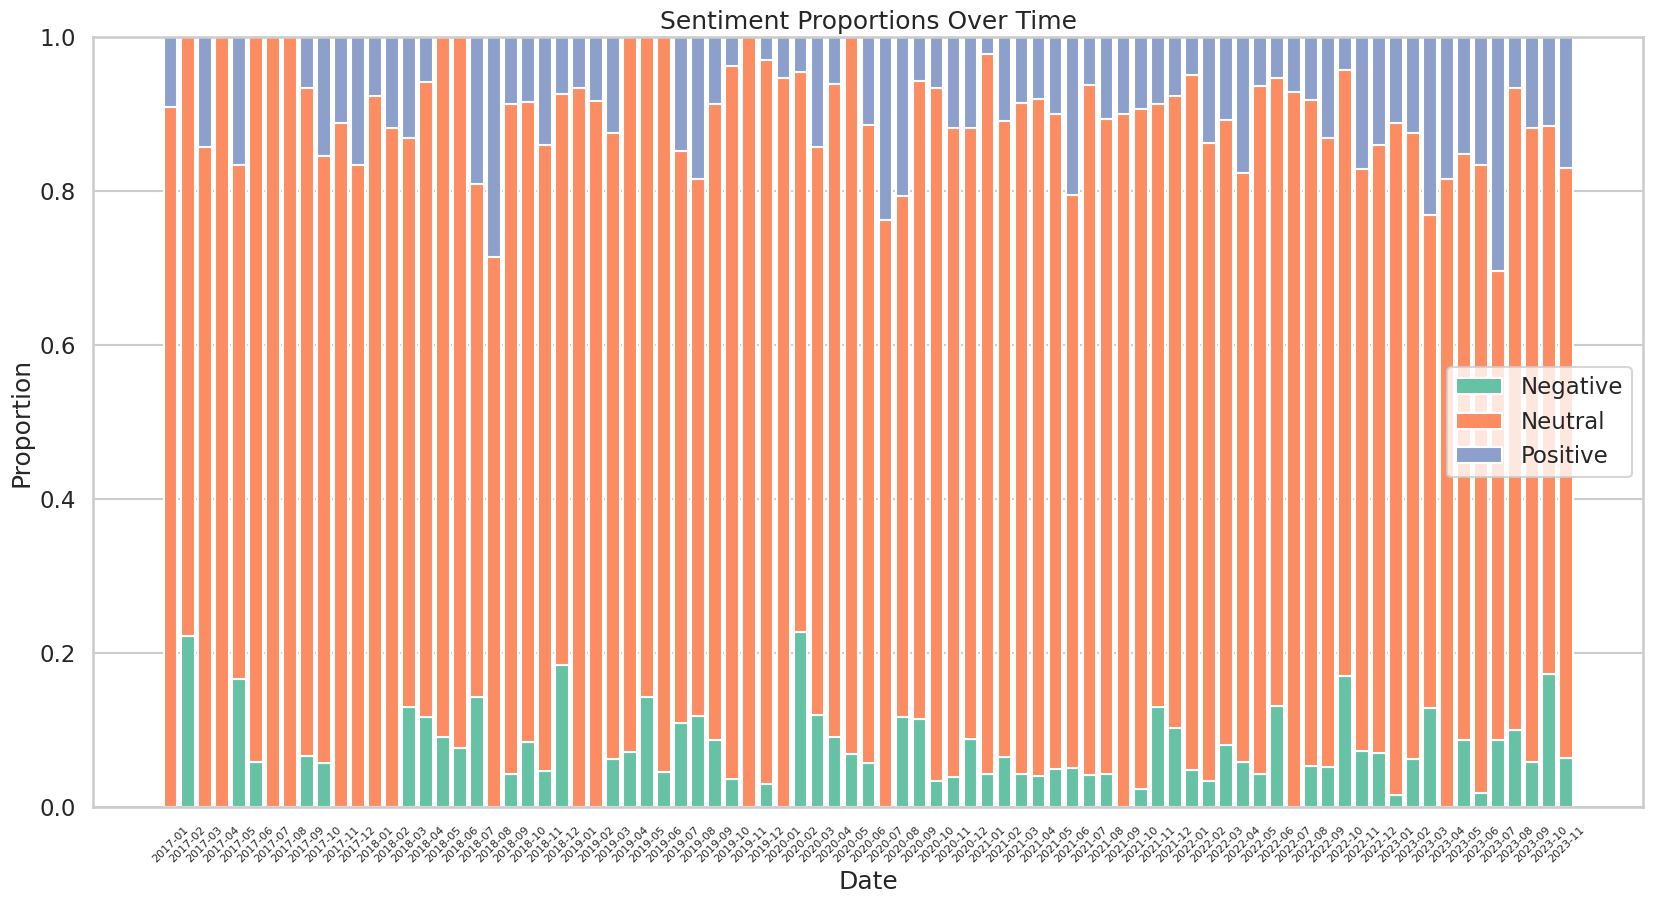

In [219]:
# 비율을 히스토그램으로 예쁘게 표시
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Set2')

# Stacked bar plot
plt.bar(df3['date'], df3['negative'], label='Negative')
plt.bar(df3['date'], df3['neutral'], bottom=df3['negative'], label='Neutral')
plt.bar(df3['date'], df3['positive'], bottom=df3['negative'] + df3['neutral'], label='Positive')

plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Sentiment Proportions Over Time')
plt.legend()

plt.show()

In [221]:
df3.set_index('date', inplace=True)
df3.to_csv('./youtube/_transcribe/youtube_sentiment.csv')

In [1]:
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, LlamaForCausalLM, LlamaTokenizerFast
from peft import PeftModel  # 0.5.0

In [2]:
import os
import datasets


template_dict = {
    'default': 'Instruction: {instruction}\nInput: {input}\nAnswer: '
}

lora_module_dict = {
    'chatglm2': ['query_key_value'],
    'falcon': ['query_key_value'],
    'bloom': ['query_key_value'],
    'internlm': ['q_proj', 'k_proj', 'v_proj'],
    'llama2': ['q_proj', 'k_proj', 'v_proj'],
    'qwen': ["c_attn"],
    'mpt': ['Wqkv'],
}


def get_prompt(template, instruction, input):

    if instruction:
        return template_dict[template].format(instruction=instruction, input=input)
    else:
        return input


def test_mapping(args, feature):

    prompt = get_prompt(
        args.instruct_template,
        feature['instruction'],
        feature['input']
    )
    return {
        "prompt": prompt,
    }


def tokenize(args, tokenizer, feature):

    prompt = get_prompt(
        args.instruct_template,
        feature['instruction'],
        feature['input']
    )
    prompt_ids = tokenizer(
        prompt, padding=False,
        max_length=args.max_length, truncation=True
    )['input_ids']
    target_ids = tokenizer(
        feature['output'].strip(), padding=False,
        max_length=args.max_length, truncation=True,
        add_special_tokens=False
    )['input_ids']

    input_ids = prompt_ids + target_ids
    exceed_max_length = len(input_ids) >= args.max_length

    # Add EOS Token
    if input_ids[-1] != tokenizer.eos_token_id and not exceed_max_length:
        input_ids.append(tokenizer.eos_token_id)

    label_ids = [tokenizer.pad_token_id] * len(prompt_ids) + input_ids[len(prompt_ids):]

    return {
        "input_ids": input_ids,
        "labels": label_ids,
        "exceed_max_length": exceed_max_length
    }


def parse_model_name(name, from_remote=False):

    if name == 'chatglm2':
        return 'THUDM/chatglm2-6b' if from_remote else 'base_models/chatglm2-6b'
    elif name == 'llama2':
        return 'meta-llama/Llama-2-7b-hf' if from_remote else 'base_models/Llama-2-7b-hf'
        # return 'NousResearch/Llama-2-7b-hf' if from_remote else 'base_models/Llama-2-7b-hf-nous'
    elif name == 'falcon':
        return 'tiiuae/falcon-7b' if from_remote else 'base_models/falcon-7b'
    elif name == 'internlm':
        return 'internlm/internlm-7b' if from_remote else 'base_models/internlm-7b'
    elif name == 'qwen':
        return 'Qwen/Qwen-7B' if from_remote else 'base_models/Qwen-7B'
    elif name == 'mpt':
        return 'cekal/mpt-7b-peft-compatible' if from_remote else 'base_models/mpt-7b-peft-compatible'
        # return 'mosaicml/mpt-7b' if from_remote else 'base_models/mpt-7b'
    elif name == 'bloom':
        return 'bigscience/bloom-7b1' if from_remote else 'base_models/bloom-7b1'
    else:
        raise ValueError(f"Undefined base model {name}")


def load_dataset(names, from_remote=False):
    dataset_names = [d for d in names.split(',')]
    dataset_list = []
    for name in dataset_names:
        rep = 1
        if not os.path.exists(name):
            rep = int(name.split('*')[1]) if '*' in name else 1
            name = ('FinGPT/fingpt-' if from_remote else 'data/fingpt-') + name.split('*')[0]
        tmp_dataset = datasets.load_from_disk(name)
        if 'test' not in tmp_dataset:
            tmp_dataset = tmp_dataset.train_test_split(0.2, shuffle=True, seed=42)

        dataset_list.extend([tmp_dataset] * rep)
    return dataset_list

In [3]:
def load_model(base_model, peft_model, from_remote=True):

    model_name = parse_model_name(base_model, from_remote)

    model = AutoModelForCausalLM.from_pretrained(
        model_name, trust_remote_code=True,
        device_map="auto",
    )
    model.model_parallel = True

    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

    tokenizer.padding_side = "left"
    if base_model == 'qwen':
        tokenizer.eos_token_id = tokenizer.convert_tokens_to_ids('<|endoftext|>')
        tokenizer.pad_token_id = tokenizer.convert_tokens_to_ids('<|extra_0|>')
    if not tokenizer.pad_token or tokenizer.pad_token_id == tokenizer.eos_token_id:
        tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        model.resize_token_embeddings(len(tokenizer))

    model = PeftModel.from_pretrained(model, peft_model)
    model = model.eval()
    return model, tokenizer


def test_demo(model, tokenizer):

    for task_name, input, instruction in zip(demo_tasks, demo_inputs, demo_instructions):
        prompt = 'Instruction: {instruction}\nInput: {input}\nAnswer: '.format(
            input=input,
            instruction=instruction
        )
        inputs = tokenizer(
            prompt, return_tensors='pt',
            padding=True, max_length=512,
            return_token_type_ids=False
        )
        inputs = {key: value.to(model.device) for key, value in inputs.items()}
        res = model.generate(
            **inputs, max_length=512, do_sample=False,
            eos_token_id=tokenizer.eos_token_id
        )
        output = tokenizer.decode(res[0], skip_special_tokens=True)
        print(f"\n==== {task_name} ====\n")
        print(output)

In [ ]:
FROM_REMOTE = True

base_model = 'falcon'
peft_model = 'FinGPT/fingpt-mt_falcon-7b_lora' if FROM_REMOTE else 'finetuned_models/MT-falcon-linear_202309210126'

model, tokenizer = load_model(base_model, peft_model, FROM_REMOTE)